In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
res = pd.read_csv("./../result_omp_polus.csv", sep=';')

In [10]:
res

,MulTime,Nthreads,MatrixSize,RunType
0,1.80398,1,1000,barriers
1,2.55407,8,1000,no_barriers
2,53.15590,8,4000,no_barriers
3,60.73620,4,4000,no_barriers
4,67.74850,1,4000,no_barriers
...,...,...,...,...
152,470.83800,1,6000,no_barriers
153,108.55600,32,4000,no_barriers
154,129.03700,16,6000,no_barriers
155,169.50900,32,6000,no_barriers


In [9]:
bar = res[res.RunType == 'barriers'].drop(['RunType'], axis=1)

In [11]:
wo_bar = res[res.RunType == 'no_barriers'].drop(['RunType'], axis=1)

In [25]:
bar_mean = bar.groupby(['Nthreads', 'MatrixSize']).mean().reset_index()
bar_mean

,Nthreads,MatrixSize,MulTime
0,1,1000,5.478742
1,1,4000,359.641975
2,1,6000,221.399667
3,2,1000,5.955513
4,2,4000,230.573325
5,2,6000,186.818667
6,4,1000,6.385070
7,4,4000,209.122500
8,4,6000,539.390250
9,8,1000,5.843002


In [37]:
wo_bar_mean = wo_bar.groupby(['Nthreads', 'MatrixSize']).mean().reset_index()
wo_bar_mean

,Nthreads,MatrixSize,MulTime
0,1,1000,1.739826
1,1,4000,72.928720
2,1,6000,279.465600
3,2,1000,2.434708
4,2,4000,70.098360
5,2,6000,201.806000
6,4,1000,2.329362
7,4,4000,63.182440
8,4,6000,174.536400
9,8,1000,2.444217


AttributeError: module 'seaborn' has no attribute 'show'

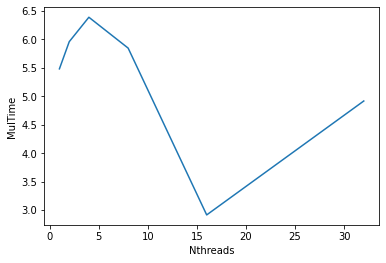

In [27]:
for size in bar_mean.MatrixSize.unique():
    sns.lineplot(data=bar_mean[bar_mean.MatrixSize == size], x='Nthreads', y='MulTime')
    sns.show()



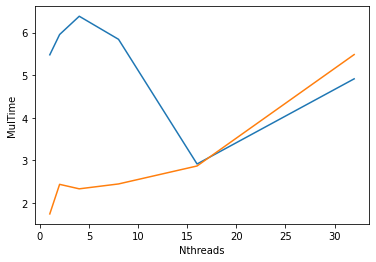

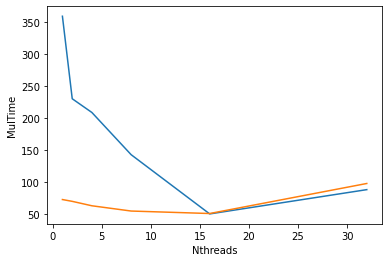

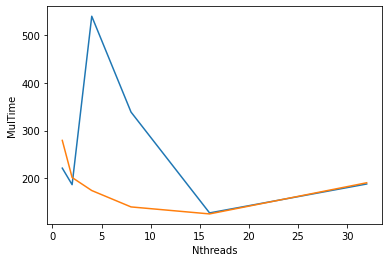

In [35]:
#fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 4*3))

# Loop over each column in the DataFrame
for i, size in enumerate(bar_mean.MatrixSize.unique()):
    
    # Select the data for the current column
    data = bar_mean[bar_mean.MatrixSize == size]
    data2 = wo_bar_mean[bar_mean.MatrixSize == size]
    
    
    # Plot the data on the corresponding subplot
    sns.lineplot(data=data, x='Nthreads', y='MulTime')
    sns.lineplot(data=data2, x='Nthreads', y='MulTime')
    plt.show()
    #axes[i].set_title(column)

In [56]:
res = bar_mean.merge(wo_bar_mean, left_on=['Nthreads', 'MatrixSize'], right_on=['Nthreads', 'MatrixSize'])

In [57]:
res.columns = ['Nthreads', 'MatrixSize', 'Time_With', 'Time_Without']

In [48]:
res['diff'] = res.Time_With - res.Time_Without

In [59]:
res.groupby(['MatrixSize']).expanding().min()

Nthreads   Time_With  Time_Without
MatrixSize                                       
1000       0        1.0    5.478742      1.739826
           3        1.0    5.478742      1.739826
           6        1.0    5.478742      1.739826
           9        1.0    5.478742      1.739826
           12       1.0    2.913162      1.739826
           15       1.0    2.913162      1.739826
4000       1        1.0  359.641975     72.928720
           4        1.0  230.573325     70.098360
           7        1.0  209.122500     63.182440
           10       1.0  143.089250     54.946133
           13       1.0   50.446550     51.066025
           16       1.0   50.446550     51.066025
6000       2        1.0  221.399667    279.465600
           5        1.0  186.818667    201.806000
           8        1.0  186.818667    174.536400
           11       1.0  186.818667    140.237200
           14       1.0  127.662000    125.581500
           17       1.0  127.662000    125.581500

In [54]:
res['Efficiency_With'] = res.Time_With / res.Nthreads
res['Efficiency_Without'] = res.Time_Without / res.Nthreads

In [55]:
res.to_csv("./res_table.csv")

,Nthreads,MatrixSize,Time_With,Time_Without,diff,Efficiency_With,Efficiency_Without
0,1,1000,5.478742,1.739826,3.738916,5.478742,1.739826
1,1,4000,359.641975,72.928720,286.713255,359.641975,72.928720
2,1,6000,221.399667,279.465600,-58.065933,221.399667,279.465600
3,2,1000,5.955513,2.434708,3.520805,2.977756,1.217354
4,2,4000,230.573325,70.098360,160.474965,115.286663,35.049180
5,2,6000,186.818667,201.806000,-14.987333,93.409333,100.903000
6,4,1000,6.385070,2.329362,4.055708,1.596267,0.582341
7,4,4000,209.122500,63.182440,145.940060,52.280625,15.795610
8,4,6000,539.390250,174.536400,364.853850,134.847563,43.634100
9,8,1000,5.843002,2.444217,3.398786,0.730375,0.305527
